# <center> Linear Trend </center>
## <center> Qualifiers to Rusia 2018 World Cup. Play-Offs phase </center>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

from scipy import stats
from matplotlib.ticker import FormatStrFormatter

# Path to choose the font stlye
fm.findSystemFonts(fontpaths=None, fontext="ttf");

In [2]:
# We use Pandas to set the FIFA ranking from January to October 2017. 
# We consider those teams that reached the qualifiers play-offs phase

date = pd.date_range("20170101", periods=10, freq='MS')
set = {
    "x": [1,2,3,4,5,6,7,8,9,10],
    "Sweden": [41,44,45,34,34,34,18,19,23,25],
    "Denmark": [47,49,48,51,51,51,47,46,26,19],
    "Croatia": [14,16,16,18,18,18,15,16,18,18],
    "Switzerland": [11,11,11,9,9,9,5,4,7,11],
    "Australia": [44,54,55,50,50,48,45,45,50,43],
    "Peru": [19,18,18,17,17,15,14,15,12,10],
    "Italy": [16,15,15,12,12,12,12,12,17,15],
    "Ireland": [23,25,24,26,26,26,29,29,34,26],
    "Greece": [42,43,46,39,39,40,38,38,47,47],
    "Northern Ireland": [32,35,35,26,26,28,22,23,20,23],
    "Honduras": [75,65,65,68,68,69,72,75,74,69],
    "New Zealand": [109,111,112,112,112,95,122,123,113,122]
}
team = pd.DataFrame(set, index=date)

from IPython.display import HTML, display_html, display
display(HTML('<h3>Position in the FIFA ranking (2017)</h3>'))
display_html(team)

,x,Sweden,Denmark,Croatia,Switzerland,Australia,Peru,Italy,Ireland,Greece,Northern Ireland,Honduras,New Zealand
2017-01-01,1,41,47,14,11,44,19,16,23,42,32,75,109
2017-02-01,2,44,49,16,11,54,18,15,25,43,35,65,111
2017-03-01,3,45,48,16,11,55,18,15,24,46,35,65,112
2017-04-01,4,34,51,18,9,50,17,12,26,39,26,68,112
2017-05-01,5,34,51,18,9,50,17,12,26,39,26,68,112
2017-06-01,6,34,51,18,9,48,15,12,26,40,28,69,95
2017-07-01,7,18,47,15,5,45,14,12,29,38,22,72,122
2017-08-01,8,19,46,16,4,45,15,12,29,38,23,75,123
2017-09-01,9,23,26,18,7,50,12,17,34,47,20,74,113
2017-10-01,10,25,19,18,11,43,10,15,26,47,23,69,122


In [3]:
# Linear approximation

se = stats.linregress(set['x'], set['Sweden'])
dk = stats.linregress(set['x'], set['Denmark'])
hr = stats.linregress(set['x'], set['Croatia'])
ch = stats.linregress(set['x'], set['Switzerland'])
au = stats.linregress(set['x'], set['Australia'])
pe = stats.linregress(set['x'], set['Peru'])

it = stats.linregress(set['x'], set['Italy'])
ie = stats.linregress(set['x'], set['Ireland'])
gr = stats.linregress(set['x'], set['Greece'])
ni = stats.linregress(set['x'], set['Northern Ireland'])
hn = stats.linregress(set['x'], set['Honduras'])
nz = stats.linregress(set['x'], set['New Zealand'])

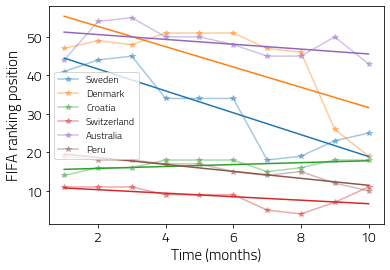

In [4]:
# We plot FIFA ranking position vs time (from January to October) for the 6 winning teams 

# Each user must use its own font path
pathttf = 'C:\\Users\\copro\\AppData\\Local\\Microsoft\\Windows\\Fonts\\TitilliumWeb-Light.ttf'
titillium    = fm.FontProperties(fname= pathttf)

Fig1 = team.plot(x = 'x', y=['Sweden','Denmark','Croatia','Switzerland','Australia','Peru'] ,marker='*',alpha=0.4)
Fig1.set_ylabel("FIFA ranking position",fontproperties=titillium, size=15)
Fig1.set_xlabel("Time (months)", fontproperties=titillium, size=15)

boxdata =Fig1.legend()
plt.setp(boxdata.texts, fontproperties=titillium)

Fig1.set_xticklabels(Fig1.get_xticks(), fontproperties=titillium, size=14)
Fig1.set_yticklabels(Fig1.get_yticks(), fontproperties=titillium, size=14)
Fig1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
Fig1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.plot(np.array(set['x']), se.intercept + se.slope*np.array(set['x']), '#1f77b4', label='fitted line')
plt.plot(np.array(set['x']), dk.intercept + dk.slope*np.array(set['x']), '#ff7f0e', label='fitted line')
plt.plot(np.array(set['x']), hr.intercept + hr.slope*np.array(set['x']), '#2ca02c', label='fitted line')
plt.plot(np.array(set['x']), ch.intercept + ch.slope*np.array(set['x']), '#d62728', label='fitted line')
plt.plot(np.array(set['x']), au.intercept + au.slope*np.array(set['x']), '#9467bd', label='fitted line')
plt.plot(np.array(set['x']), pe.intercept + pe.slope*np.array(set['x']), '#8c564b', label='fitted line')
plt.savefig("winners.svg") # Activate to save file

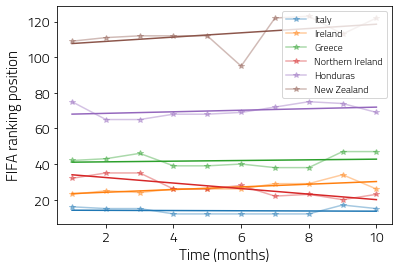

In [5]:
# We plot FIFA ranking position vs time (from January to October) for the 6 losing teams 

# Each user must use its own font path
pathttf = 'C:\\Users\\copro\\AppData\\Local\\Microsoft\\Windows\\Fonts\\TitilliumWeb-Light.ttf'
titillium    = fm.FontProperties(fname= pathttf)

Fig1 = team.plot(x = 'x', y=['Italy','Ireland','Greece','Northern Ireland','Honduras','New Zealand'] ,marker='*',alpha=0.4)
Fig1.set_ylabel("FIFA ranking position",fontproperties=titillium, size=15)
Fig1.set_xlabel("Time (months)", fontproperties=titillium, size=15)

boxdata =Fig1.legend()
plt.setp(boxdata.texts, fontproperties=titillium)

Fig1.set_xticklabels(Fig1.get_xticks(), fontproperties=titillium, size=14)
Fig1.set_yticklabels(Fig1.get_yticks(), fontproperties=titillium, size=14)
Fig1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
Fig1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.plot(np.array(set['x']), it.intercept + it.slope*np.array(set['x']), '#1f77b4', label='fitted line')
plt.plot(np.array(set['x']), ie.intercept + ie.slope*np.array(set['x']), '#ff7f0e', label='fitted line')
plt.plot(np.array(set['x']), gr.intercept + gr.slope*np.array(set['x']), '#2ca02c', label='fitted line')
plt.plot(np.array(set['x']), ni.intercept + ni.slope*np.array(set['x']), '#d62728', label='fitted line')
plt.plot(np.array(set['x']), hn.intercept + hn.slope*np.array(set['x']), '#9467bd', label='fitted line')
plt.plot(np.array(set['x']), nz.intercept + nz.slope*np.array(set['x']), '#8c564b', label='fitted line')
plt.savefig("losers.svg") # Activate to save file